In [91]:
import pandas as pd
cluster_df = pd.read_csv('cluster_data.csv')

In [92]:
display(cluster_df)
display(cluster_df.describe())

,Feature 1,Feature 2
0,2.698582,-0.672960
1,-0.128113,4.355952
2,2.509049,5.773146
3,-1.518276,3.444886
4,-0.072283,2.883769
...,...,...
495,10.303693,-4.378493
496,-0.730000,6.254563
497,-3.478708,2.257991
498,-2.081214,2.447245


,Feature 1,Feature 2
count,500.000000,500.000000
mean,1.831353,2.694970
std,4.086149,3.494165
min,-3.896491,-4.378493
25%,-1.174033,0.200712
50%,0.604212,2.807746
75%,2.750212,5.132506
max,11.867680,10.216205


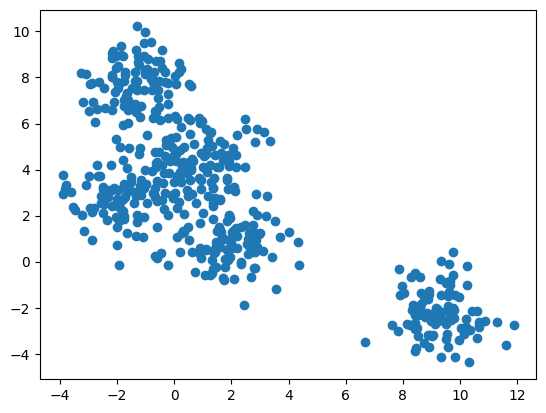

In [93]:
import matplotlib.pyplot as plt
plt.scatter(cluster_df['Feature 1'], cluster_df['Feature 2'])

## KMeans

In [94]:
from sklearn.cluster import KMeans

mdl_k_means = KMeans(n_clusters=4)
cluster_df['cluster_4'] = mdl_k_means.fit_predict(cluster_df[['Feature 1', 'Feature 2']])

In [95]:
cluster_df

,Feature 1,Feature 2,cluster_4
0,2.698582,-0.672960,2
1,-0.128113,4.355952,0
2,2.509049,5.773146,0
3,-1.518276,3.444886,0
4,-0.072283,2.883769,0
...,...,...,...
495,10.303693,-4.378493,1
496,-0.730000,6.254563,3
497,-3.478708,2.257991,0
498,-2.081214,2.447245,0


In [96]:
from sklearn.metrics import silhouette_score

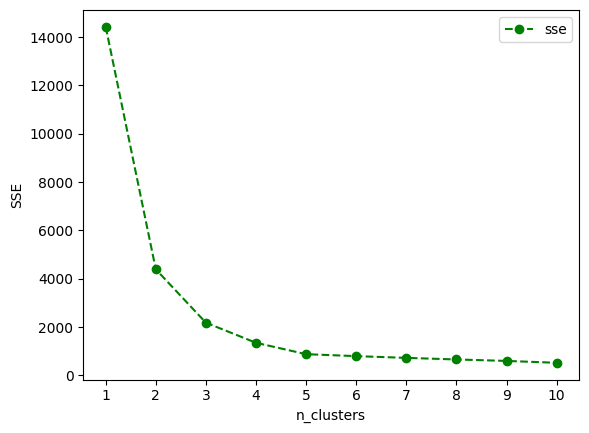

In [106]:
import numpy as np

sse_lst = []
silhouette_score_lst = []
for n_cluster in range(1,11):
    knn = KMeans(n_clusters=n_cluster, random_state=42)
    knn.fit(cluster_df[['Feature 1', 'Feature 2']])
    sse_lst.append(knn.inertia_)
    #silhouette_score_lst.append(silhouette_score(cluster_df[['Feature 1', 'Feature 2']], knn.labels_))


plt.plot(np.array(list(range(1,11))),np.array(sse_lst), 'og--', label='sse')
plt.xticks(np.array(list(range(1,11))))
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.legend()

In [98]:
centers = mdl_k_means.cluster_centers_
centers

array([[-0.48801041,  3.59299065],
       [ 9.30286933, -2.23802673],
       [ 1.85018446,  0.86350975],
       [-1.16660875,  7.63898557]])

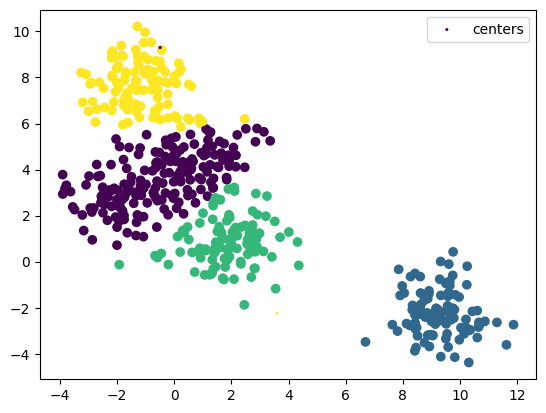

In [99]:
plt.scatter(cluster_df[['Feature 1']], cluster_df[['Feature 2']], c=cluster_df['cluster_4'])
plt.scatter(centers[0], centers[1], centers[2], centers[3], label='centers')
plt.legend()


## Heirarchical clustering

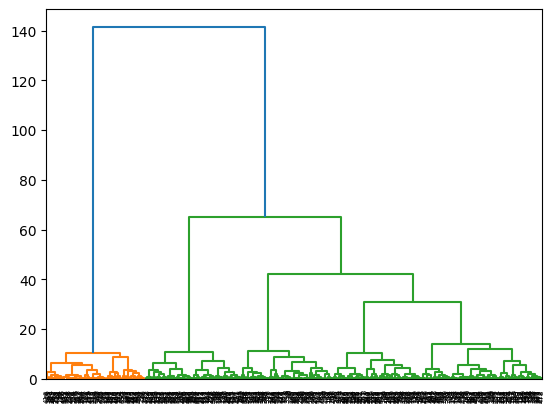

In [100]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(cluster_df[['Feature 1', 'Feature 2']], method='ward'))

In [101]:
mdl_hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_pred_hc = mdl_hc.fit_predict(cluster_df[['Feature 1', 'Feature 2']])

In [102]:
cluster_df['cluster_hc'] = clusters_pred_hc

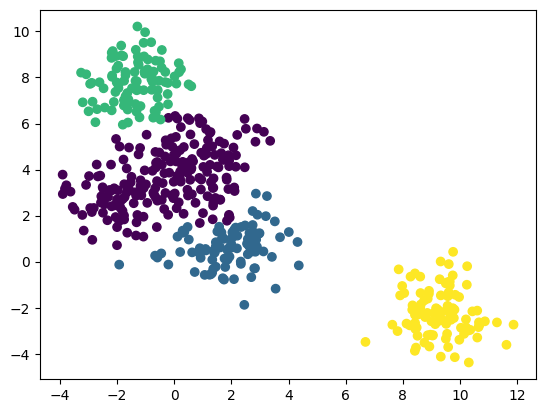

In [103]:
plt.scatter(cluster_df[['Feature 1']], cluster_df[['Feature 2']], c=cluster_df['cluster_hc'])
